<center>
    <h1>Tema 3: Algoritmos de Aprendizaje Supervisado</h1>
    <h1>Clasificación</h1>
    <h1>Regresión Logística</h1>
    <br>
    <h5>Prof. Wladimir Rodriguez</h5>
    <h5>wladimir@ula.ve</h5>
    <h5>Departamento de Computación</h5>
</center>

## Regresión Logística

La Regresión Logística es un modelo de clasificación que es muy fácil de implementar, pero que funciona muy bien en clases linealmente separables. Es uno de los algoritmos más utilizados para la clasificación. Al igual que el Perceptron y el Adaline, el modelo de regresión logística es también un modelo lineal para la clasificación binaria que puede extenderse a la clasificación multiclass mediante la técnica OvR (Uno contra el resto).

En Regresión Logística se trata de predecir la probabilidad que un ejemplo dado pertenezca a la clase "1" versus la probabilidad de que pertenezca a la clase "0". Especificamente, se trata de aprender una función de la forma:

$$P(y=1|x)=h_w(x)=\frac{1}{1+exp(-w^Tx)}\equiv\sigma(w^Tx)$$

$$P(y=0|x)=1-P(y=1|x)=1-h_{w}(x)$$

La función

$$\sigma(z) \equiv \frac{1}{1+exp(-z)}$$

se llama a menudo función "sigmoide" o "logística", es una función en S que "aplana" el valor de $w^Tx$ al rango [0,1] para que se pueda interpretar $h_w(x)$ como una probabilidad. La meta es buscar un valor de $w$ para que la probabilidad $P(y=1|x)=h_w(x)$ sea grande cuando $x$ pertenece a la clase "1" y pequeña cuando $x$ pertenece a la clase "0" (de manera que $P(y=0|x)$ es grande). Para un conjunto de ejemplos de entrenamiento con etiquetas binarias $\{(x^{(i)}, y^{(i)}): i = 1, ..., m\}$ la siguiente función de coste mide cuán bien una $h_w$ dada hace esto:

$$J(w)=-\sum{(y^{(i)}log(h_{w}x^{(i)}))+(1-y^{(i)})log(1-h_{w}x^{(i)}))}$$

Sólo uno de los dos términos de la suma es diferente de cero para cada ejemplo de entrenamiento (dependiendo de si la etiqueta $y^{(i)}$ es 0 o 1). Cuando $y^{(i)}= 1$ minimizar la función de coste significa que es necesario hacer $h_{w}(x^{(i)})$ grande, y cuando $y^{(i)} = 0$ se debe hacer $1-h_{w}$ grande.

La función de costo mide cuán bien una hipótesis $h_{w}$ se ajusta a los datos de entrenamiento. Se puede aprender a clasificar los datos de entrenamiento minimizando $J(w)$ para encontrar la mejor opción de $w$. Una vez hecho esto, se puede clasificar un nuevo punto de prueba como "1" o "0" comprobando cuál de estas dos etiquetas de clase es más probable: si $P (y = 1 | x)> P (y = 0 | x )$ entonces etiquetamos el ejemplo como "1", y "0" de lo contrario. Esto es lo mismo que comprobar si $h_{w} (x)> 0.5$.

El gradiente de la función de coste es igual a:

$$\frac{∂J}{∂w_j} = -\sum_{i}(y^{(i)}-\sigma(z^{(i)}))x_j^{(i)}$$

### Arquitectura de la Regresión Logística

La arquitectura de un clasifcador de Regresión Logística se puede relacionar con la del Adaline, simplemente sustituyendo la función de activación por la función sigmoide

<img src="../figuras/RegresionLogistica.png" width="75%">

### Función Sigmoide
A continuación se muestra una gráfico de la función sigmoide para algunos valores en el rango de -10 a 10.

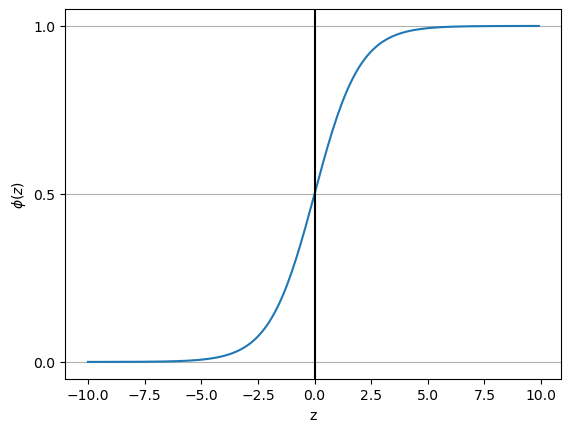

In [8]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoide(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoide(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.05, 1.05)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True);

## Gráfica de la Función de Coste

La siguiente gráfica siguiente ilustra el coste para la clasificación de una instancia de una sola muestra para diferentes valores de $\sigma(z)$

Se puede observar que el costo se aproxima a 0 (línea azul simple) si se predice correctamente que un ejemplo pertenece a la clase 1. Del mismo modo, podemos ver en el eje $y$ que el coste también se aproxima a 0 si predecimos correctamente $y = 0$ (línea discontinua). Sin embargo, si la predicción es incorrecta, el costo va hacia infinito. La moraleja es que se penaliza predicciones erróneas con un costo cada vez mayor

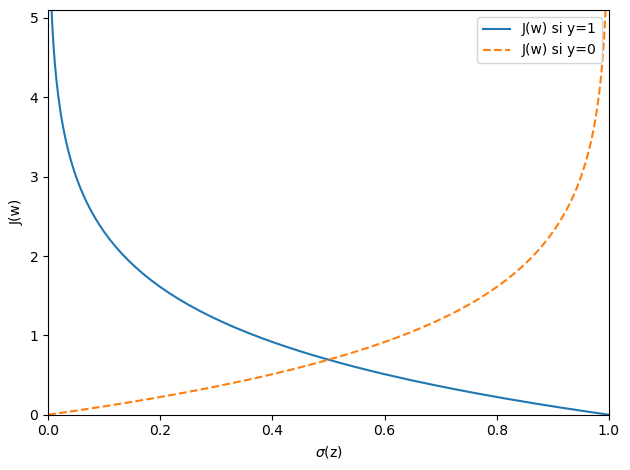

In [9]:
def coste_1(z):
    return - np.log(sigmoide(z))


def coste_0(z):
    return - np.log(1 - sigmoide(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoide(z)

c1 = [coste_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) si y=1')

c0 = [coste_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) si y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout();

## Ventajas y desventajas de la Regresión Logística

### Ventajas:
+ Rapido y fácil para entrenar
+ Rapido para aplicar
+ Robusto al ruido
+ La varianza es baja
+ La salida se puede interpretar como una probabilidad

### Desventajas:
+ Menos preciso que otros métodos
+ No se pueden resolver problemas no lineales ya que su superficie de decisión es lineal
+ El espacio de hipotesis es limitado ya que es un modelo lineal generalizado
+ Alto sesgo

In [10]:
from matplotlib.colors import ListedColormap


def graficar_regiones_decision(X, y, clasificador, resolucion=0.02):

    # fijar los marcadores y el mapa de colores
    marcadores = ('s', 'o', 'x', '^', 'v')
    colores = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolucion),
                           np.arange(x2_min, x2_max, resolucion))
    Z = clasificador.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # graficar los ejemplos de clases
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, 
                    edgecolor='black',
                    marker=marcadores[idx], 
                    label=cl)

## Algoritmo de Regresión Logística

La siguiente implementación esta basada en el algoritmo del Adaline, solamente modificando la función de actualizacion.

In [11]:
class RegresionLogistica(object):
    
    def __init__(self, eta=0.01, num_iteraciones=50):
        self.eta = eta
        self.num_iteraciones = num_iteraciones

    def fit(self, X, y):
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.coste_ = []

        for i in range(self.num_iteraciones):
            entrada = self.entrada(X)
            # En este caso el método "activacion" es la función sigmoide
            salida = self.activacion(X)
            errores = (y - salida)
            self.w_[1:] += self.eta * X.T.dot(errores)
            self.w_[0] += self.eta * errores.sum()
            coste = (errores**2).sum() / 2.0
            self.coste_.append(coste)
        return self

    def entrada(self, X):
        #Calcular la entrada
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activacion(self, X):
        #Calcular la activación lineal
        return sigmoide(self.entrada(X))

    def predict(self, X):
        # Retornar la etiqueta de la clase
        return np.where(self.activacion(X) >= 0.5, 1, 0)

### Probar el algoritmo con el conjunto de datos de Iris

Se tomarán solo los primeros 100 ejemplos del conjunto de datos. Los ejemplos con las flores Iris-setosa e Iris-vericolor. Y solo dos de los atributos el largo del sepalo y el largo del petalo. Con estos datos el problema es linealmente separable

In [12]:
import pandas as pd

df = pd.read_csv('../datos/iris.csv', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Crear los conjuntos X e y. Y normalizar los X usando el `StandardScalar` de sklearn. Graficar los datos para poder observar que son linealmente separables.

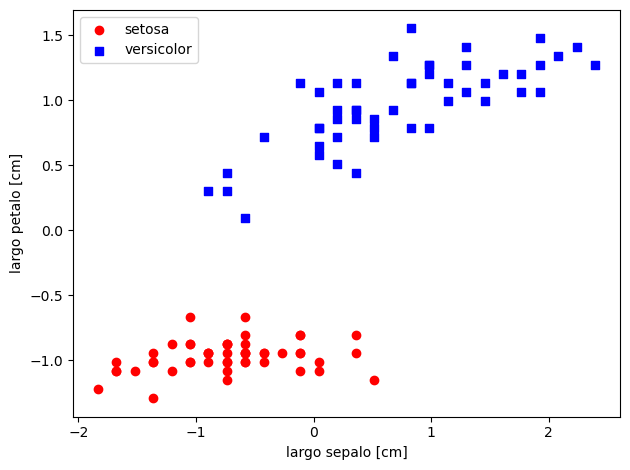

In [13]:
from sklearn.preprocessing import StandardScaler

# seleccionar setosa y versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# extraer el largo del sepalo y el largo del petalo
X = df.iloc[0:100, [0, 2]].values
sc = StandardScaler()
X = sc.fit_transform(X)
# graficar la data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='versicolor')

plt.xlabel('largo sepalo [cm]')
plt.ylabel('largo petalo [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Aplicar el algoritmo de Regresión Logística

Mostrar gráfico de las regiones de decisión y de la función de coste

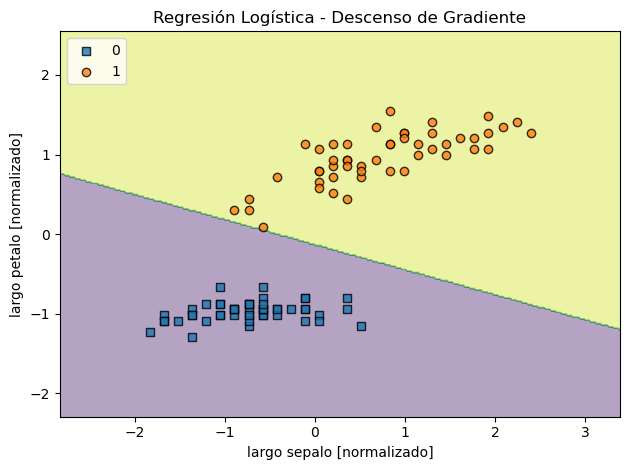

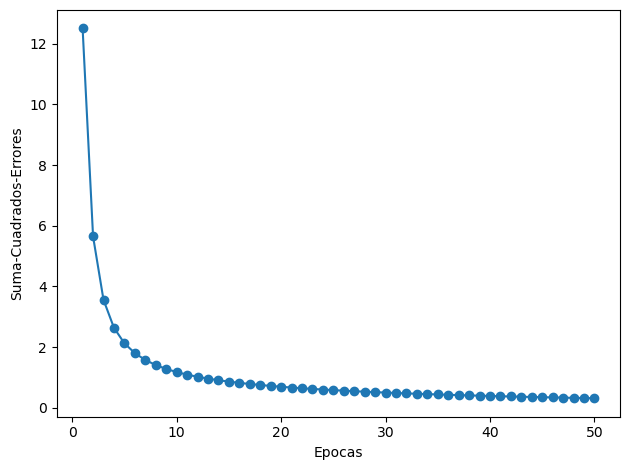

In [14]:
rl = RegresionLogistica(num_iteraciones=50, eta=0.01)
rl.fit(X, y)
graficar_regiones_decision(X, y, clasificador=rl)
plt.title('Regresión Logística - Descenso de Gradiente')
plt.xlabel('largo sepalo [normalizado]')
plt.ylabel('largo petalo [normalizado]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(rl.coste_) + 1), rl.coste_, marker='o')
plt.xlabel('Epocas')
plt.ylabel('Suma-Cuadrados-Errores')

plt.tight_layout();

### Aplicar el algoritmo de Regresión Logística de sklearn

Mostrar gráfico de las regiones de decisión

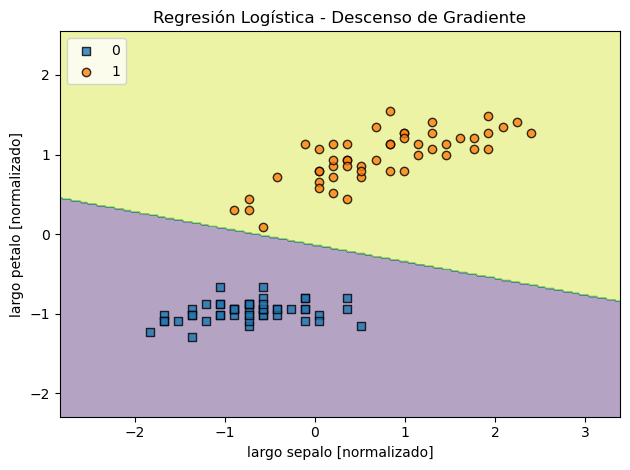

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X, y)
graficar_regiones_decision(X, y, clasificador=lr)
plt.title('Regresión Logística - Descenso de Gradiente')
plt.xlabel('largo sepalo [normalizado]')
plt.ylabel('largo petalo [normalizado]')
plt.legend(loc='upper left')
plt.tight_layout();

### Aplicar el algoritmo de Regresión Logística CV de sklearn

Mostrar gráfico de las regiones de decisión

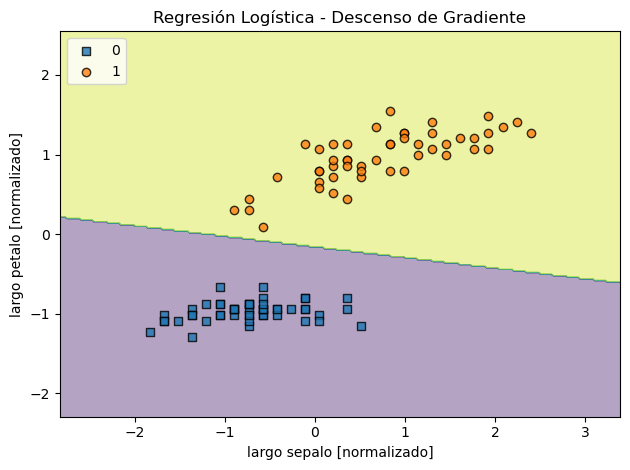

In [16]:
from sklearn.linear_model import LogisticRegressionCV
lrcv = LogisticRegressionCV(cv=10)
lrcv.fit(X, y)
graficar_regiones_decision(X, y, clasificador=lrcv)
plt.title('Regresión Logística - Descenso de Gradiente')
plt.xlabel('largo sepalo [normalizado]')
plt.ylabel('largo petalo [normalizado]')
plt.legend(loc='upper left')
plt.tight_layout();

### Ejemplo

In [17]:
from sklearn.datasets import make_classification

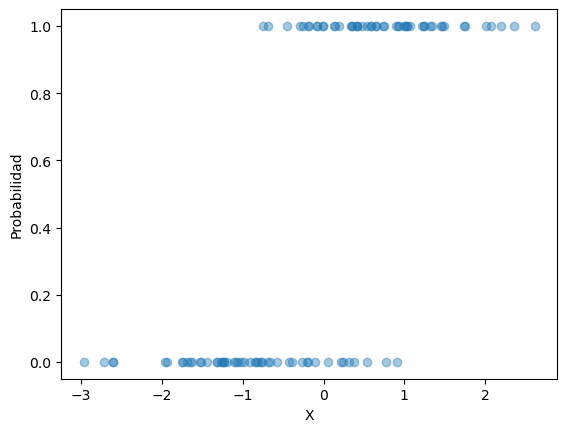

In [18]:
# con el parámetro random_state nos aseguramos obtener siempre lo mismo
X, y = make_classification(n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1,
                           class_sep=0.7, random_state=18)
plt.scatter(X, y, alpha=0.4)
plt.xlabel('X')
plt.ylabel('Probabilidad');

In [19]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

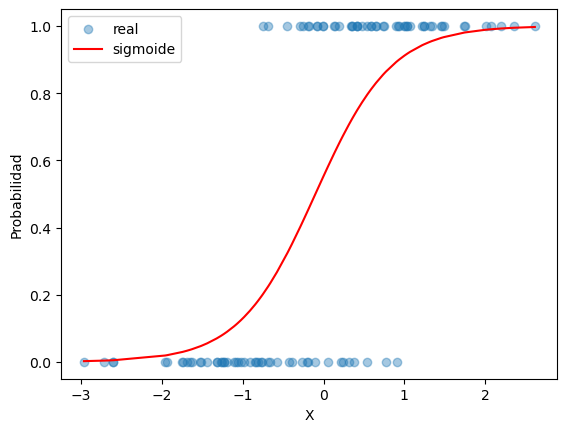

In [20]:
plt.scatter(X, y, alpha=0.4, label='real')
plt.plot(np.sort(X, axis=0), lr.predict_proba(np.sort(X, axis=0))[:,1], color='r', label='sigmoide')
plt.legend(loc=2)
plt.xlabel('X')
plt.ylabel('Probabilidad');

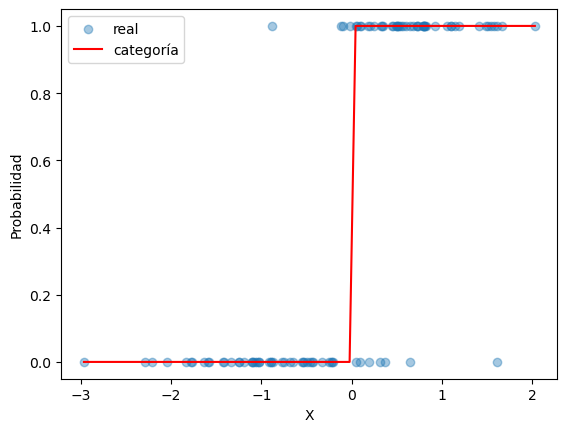

In [42]:
plt.scatter(X, y, alpha=0.4, label='real')
plt.plot(np.sort(X, axis=0), lr.predict(np.sort(X, axis=0)), color='r', label='categoría')
plt.legend(loc=2)
plt.xlabel('X')
plt.ylabel('Probabilidad');